# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [520]:
import pandas as pd
import matplotlib.pyplot as plt

In [521]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

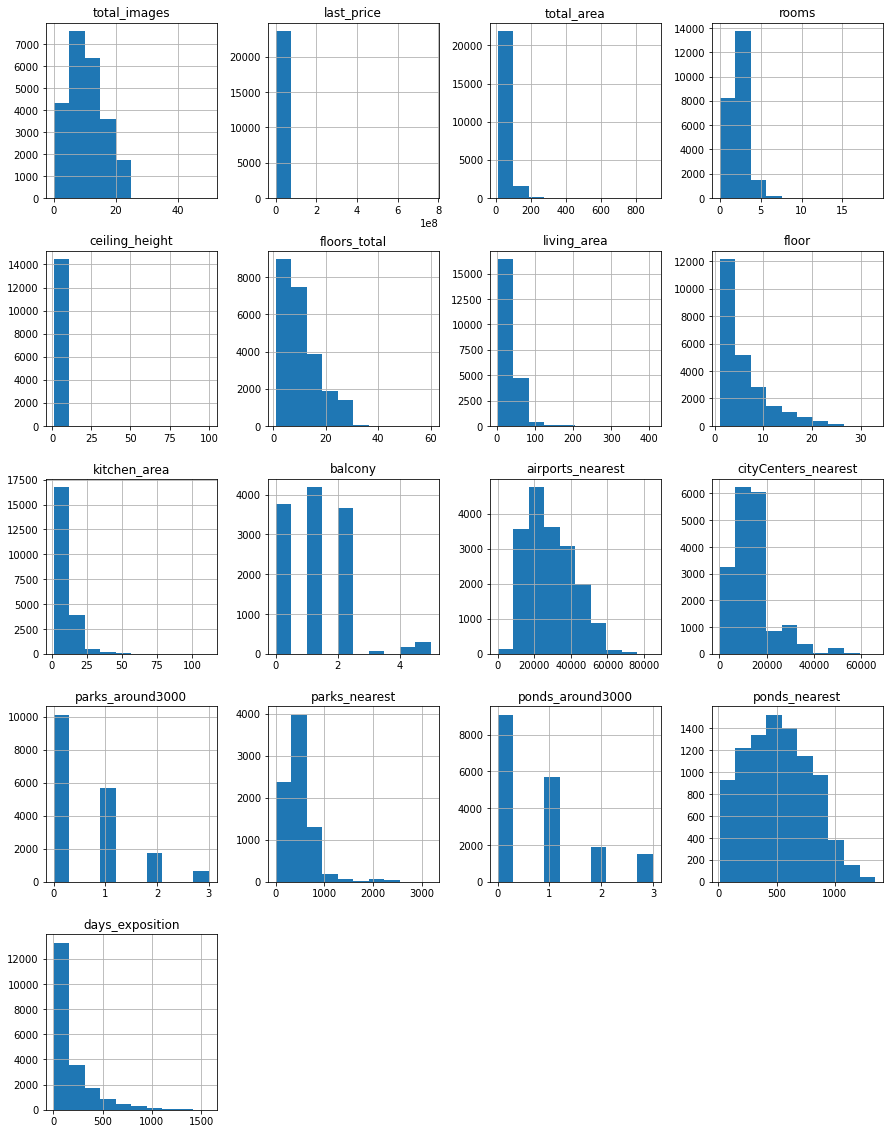

In [523]:
data.hist(figsize=(15, 20))# построем гистограмму  

**Вывод:** Большое количество данных не имеют нормального распределения, возможно, это связано c выбросами. Надо проверить на аномалии `last_price`, `total_area`, `ceiling_height`, `living_area`, `parks_nearest`

### Выполните предобработку данных

#### Проверим количество пропущенных значений 

In [524]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [525]:
data.isna().sum()/data.shape[0]*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Большое количество пропусков в колонке `is_apartment` 88%, скорее всего связано с отсутствием непосредственно аппартаментов.
В колонке balcony по той же причине отсутсвует 48% данных. `airports_nearest, cityCenters_nearest, ponds_nearest` и остальные 
похожие колонки заполнены автоматически. Пропуски `living_area, kitchen_area`,`floors_total`,`days_exposition` данные отсутствуют . Есть большое количество 
отсутствия данных в `ceiling_height` 38% попробуем заполнить медианным значением.
`locality_name`заполняем `Неизвестно`

##### `ceiling_height`

<AxesSubplot:>

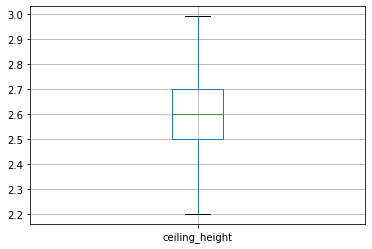

In [526]:
data.query('ceiling_height < 3 and ceiling_height >= 2.2').boxplot(column='ceiling_height')

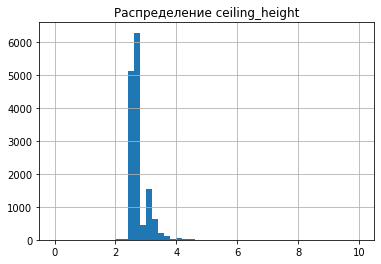

In [527]:
data['ceiling_height'].hist(bins=50,range=(0,10))
plt.title('Распределение ceiling_height')
plt.show()

In [528]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

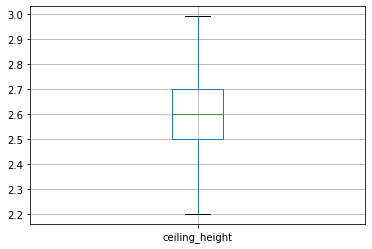

In [529]:
data.query('ceiling_height < 3 and ceiling_height >= 2.2').boxplot(column='ceiling_height')

Получили нормальное распределение высоты потолков, заполним отсутствующие значения

In [530]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

**Вывод:** Заполнили `ceiling_height` медианным значением

Заполнение пропусков в `is_apartment`

In [531]:
data['is_apartment']=data['is_apartment'].fillna(False)

Заполнение пропусков в `balcony`

In [532]:
data['balcony']=data['balcony'].fillna(0)

`locality_name` NaN заполняем на `Неизвестно`

In [533]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [534]:
_list=['cityCenters_nearest','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']
for row in _list: 
    data[row]=data[row].fillna(0)

In [535]:
for row in _list:
    print(row,data[row].isna().sum())

cityCenters_nearest 0
airports_nearest 0
parks_around3000 0
parks_nearest 0
ponds_around3000 0
ponds_nearest 0


**Вывод** заменим пропущенные значения на 0 в колонках `'cityCenters_nearest','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'`
`locality_name` заполняли на *Неизвестно*

#### Изменение типов данных

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [537]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M') #2019-03-07T00:00:00

In [538]:
data['first_day_exposition']#check

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [539]:
data['last_price'].astype('int32')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32

In [540]:
data['balcony'].astype('int32')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int32

Изменены типы данных в `first_day_exposition` на datetime64 `last_price` на int, потому что работаем с ценой и 
количество балконов.

#### Устранение явных и неявных дубликатов

In [541]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестно',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровс

In [542]:
data['locality_name'].nunique()

365

In [543]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок при железнодорожной станции','городской поселок','коттеджный поселок','поселок станции','поселок городского типа'],'поселок', regex=True)
) 

In [544]:
data['locality_name'].nunique()

319

In [545]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестно',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'дере

**Вывод**: Устранены неявные дубликаты *'поселок при железнодорожной станции','городской поселок','коттеджный поселок','поселок станции','поселок городского типа'*
    Заменены на *'поселок'*

#### Обработка аномалий

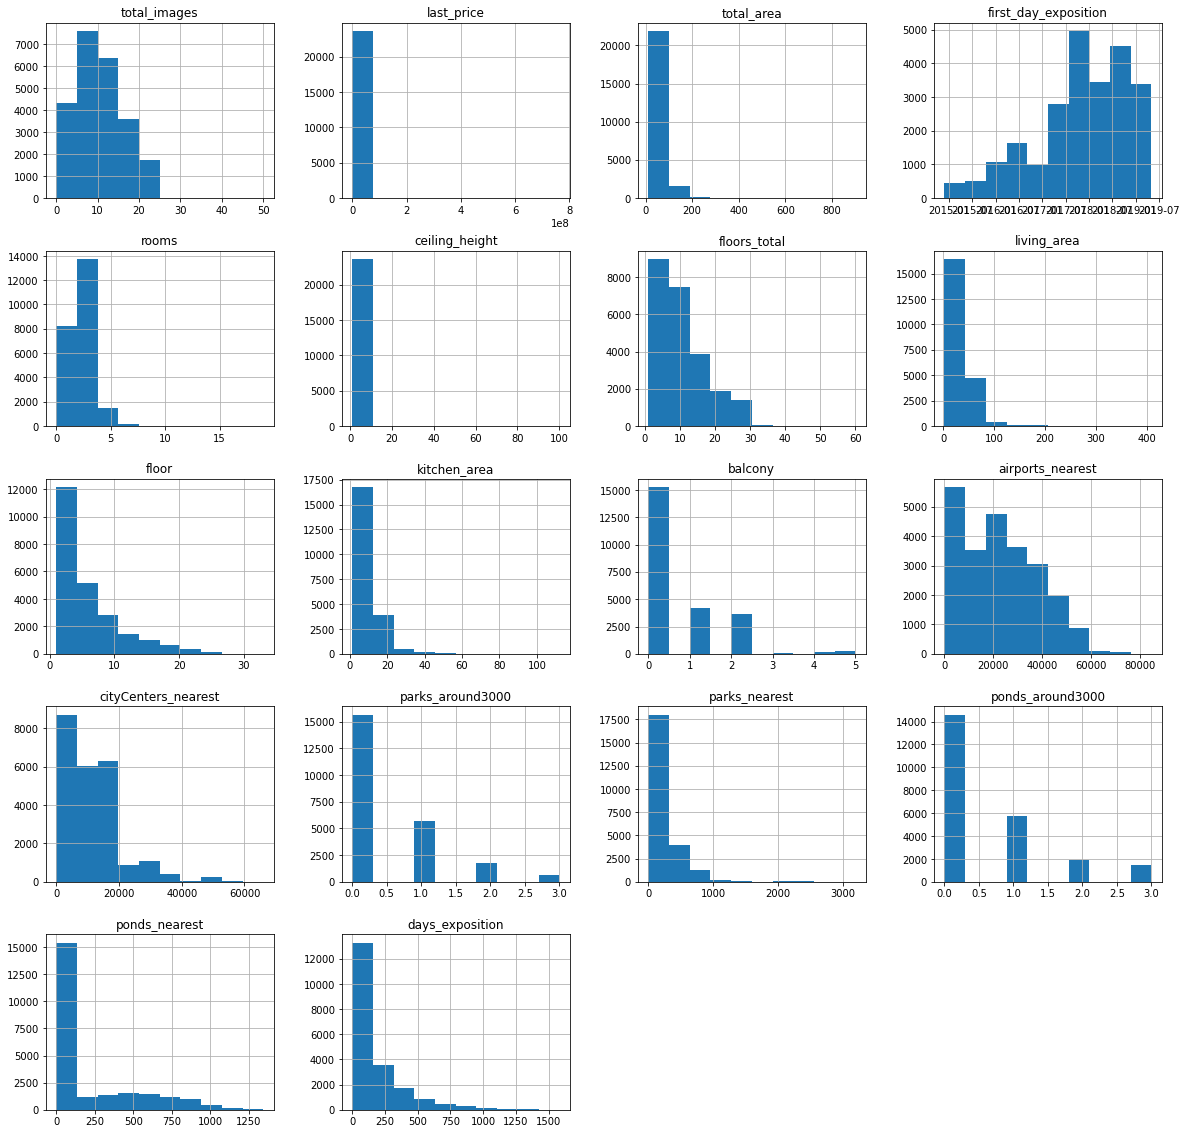

In [546]:
data.hist(figsize=(20,20))
plt.show()

##### `last_price`
Посмотрим снова на гистограммы, проверим `last_price`

<AxesSubplot:>

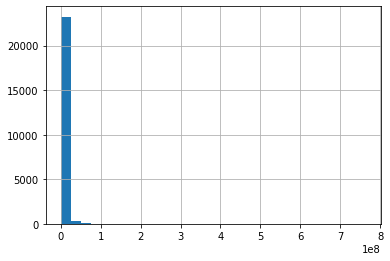

In [547]:
data['last_price'].hist(bins=30)

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

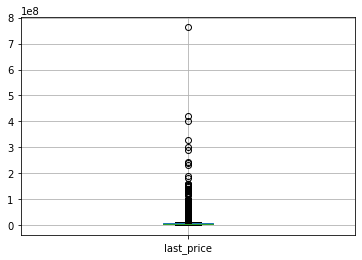

In [548]:
data.boxplot(column='last_price')
data['last_price'].describe()

Виден сильный выброс, посмотрим какую долю занимают высокие цены 

In [549]:
data_price = data['last_price'] > 2.00000e+07
data_price.mean()

0.02983248238322292

<AxesSubplot:>

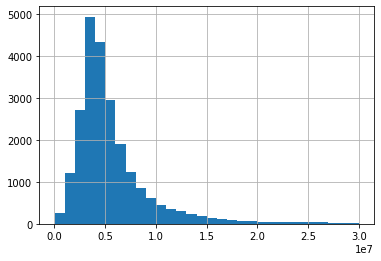

In [550]:
data.query('last_price < 3.000000e+07')['last_price'].hist(bins=30)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

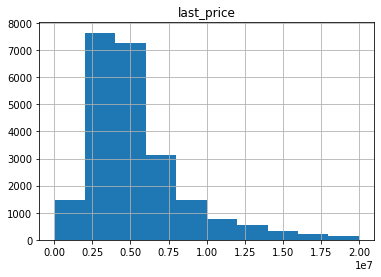

In [551]:
good_data = data[data['last_price'] < 2.00000e+07]
good_data.hist(column='last_price')

In [552]:
data_price = data['last_price'] > 1.50000e+07
data_price.mean()

0.050803831385290515

**Вывод**:`last_price`
Виден большой хвост в стоимости квартир выше 20 миллионов, что составляет 3% от общей выборки. Это сильно влияет на остальные 
результаты. Убрали эти квартиры.

##### `total_area`

<AxesSubplot:>

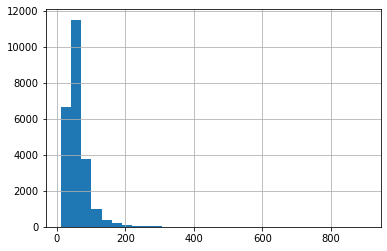

In [553]:
data['total_area'].hist(bins=30)

In [554]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [555]:
data_area = data['total_area'] > 150
data_area.mean()

0.02379847250938858

<AxesSubplot:>

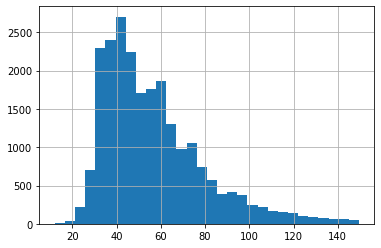

In [556]:
data.query('total_area < 150')['total_area'].hist(bins=30)

count    22777.000000
mean        55.598621
std         21.637601
min         12.000000
25%         39.700000
50%         50.800000
75%         66.700000
max        149.200000
Name: total_area, dtype: float64

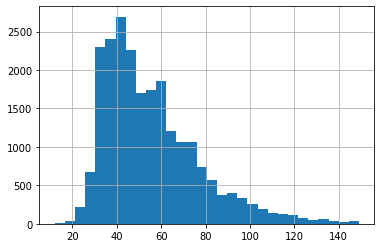

In [557]:
good_data = good_data.query('total_area < 150')
good_data['total_area'].hist(bins=30)
good_data['total_area'].describe()

**Вывод**:Удалили квартиры с общей площадью больше 150, сильно влияли на результат при это составляли 2% от данных

##### `living_area`

<AxesSubplot:>

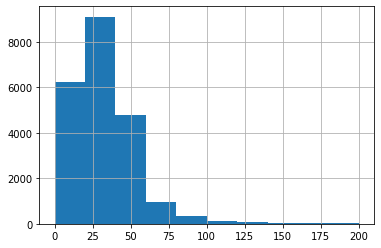

In [558]:
data['living_area'].hist(range=(0,200))

In [559]:
data_area = data['living_area'] > 80
data_area.mean()

0.02894636904510739

In [560]:
good_data = good_data.query('living_area < 80')

**Вывод**: в колонке `living_area`квартиры с жилой площадью больше 100 $м^2$ занимают 3%, уберем их из таблицы 

##### `kitchen_area`

<AxesSubplot:>

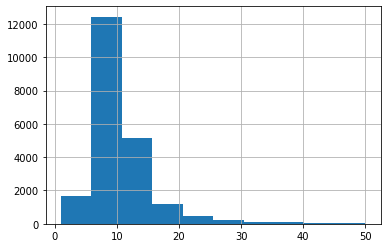

In [561]:
data['kitchen_area'].hist(range=(1,50))

<AxesSubplot:>

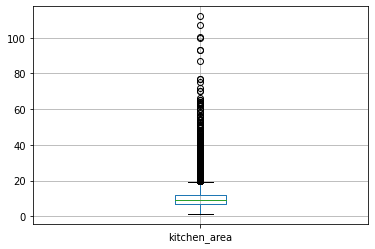

In [562]:
data.boxplot(column='kitchen_area')

In [563]:
data_k = data['kitchen_area'] > 25
data_k.mean()

0.02329212203046542

In [564]:
good_data = good_data.query('kitchen_area < 25')

In [565]:
good_data.shape

(19692, 22)

**Вывод**: в колонке `kitchen_area`квартиры с кухней площадью больше 25 м^2 занимают 2%, уберем их из таблицы 

#### Промежуточный вывод 
В ходе преобрабоке данных постарались привести к нормальному распределению. 
- Заполнили медианным значением в высоту квартир
- Заменим пропущенные значения на 0 в колонках 'cityCenters_nearest','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'
- `locality_name` заполняли на *Неизвестно*
- `first_day_exposition last_price balcony` привели к типу datetime64, int32 ,int32 соответственно
- Убрали аномалии в `total_area, last_price, kitchen_area, living_area` составлявщие более 3% 



### Добавьте в таблицу новые столбцы

In [566]:
good_data['one_per_metr'] = good_data['last_price'] / good_data['total_area'] #цена одного квадратного метра
good_data['one_per_metr'] = good_data['one_per_metr'].round(2)

In [567]:
good_data['weekday'] = good_data['first_day_exposition'].dt.weekday#день недели публикации объявления

In [568]:
good_data['month'] = good_data['first_day_exposition'].dt.month

In [569]:
good_data['year'] = good_data['first_day_exposition'].dt.year

In [570]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'
    
good_data['type_floor'] = good_data.apply(floor_type, axis=1)#тип этажа квартиры 

In [571]:
good_data['cityCenters_nearest'] = good_data['cityCenters_nearest'] / 1000
good_data['cityCenters_nearest'] = good_data['cityCenters_nearest'].round()
good_data['cityCenters_nearest']

1        19.0
2        14.0
5         0.0
6        19.0
8         0.0
         ... 
23692     0.0
23693    34.0
23694     4.0
23695     0.0
23698     0.0
Name: cityCenters_nearest, Length: 19692, dtype: float64

### Проведите исследовательский анализ данных

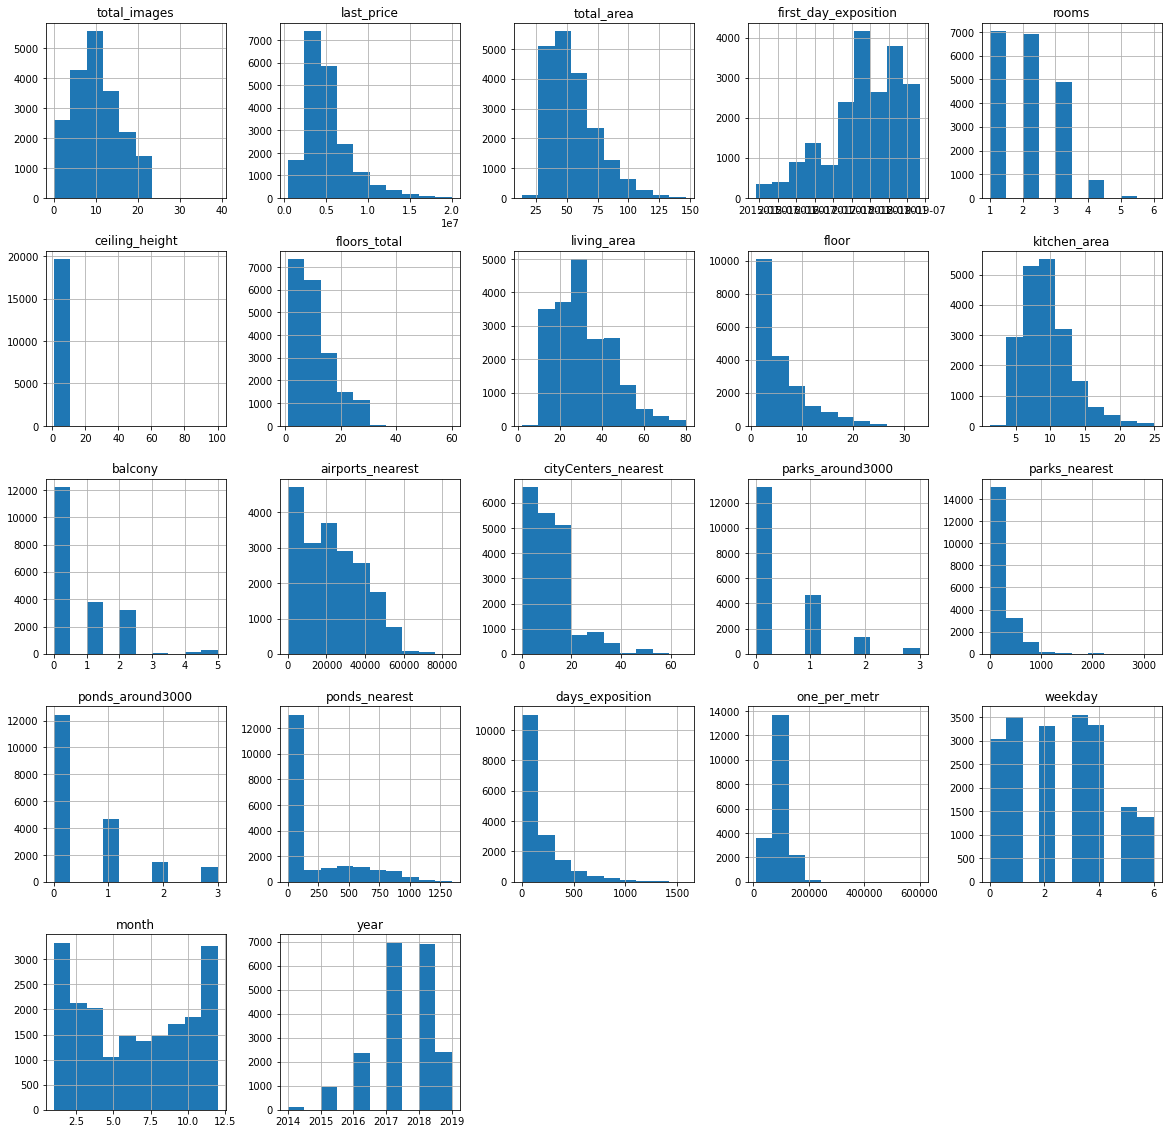

In [572]:
good_data.hist(figsize=(20,20))
plt.show()

**Вывод** После проведения предобработки данных, данные стали выглядить лучше, кроме ceiling_height. Исселедуем колонку.

<AxesSubplot:>

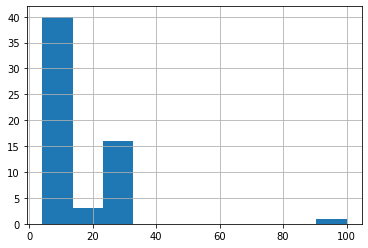

In [573]:
good_data['ceiling_height'].hist(range=(4,100))

In [574]:
good_data = good_data.query('ceiling_height < 100')

Большое количество данных указаны в другой размерности в колонках `ceiling_height`

In [575]:
def fix_height(row):
    try:
        if row > 10:
            return row / 10
    except:
        print('smt wrong', row)
    return row
    
good_data['ceiling_height'] = good_data['ceiling_height'].apply(fix_height)

In [576]:
good_data.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_per_metr,weekday,month,year,type_floor
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,0.0,0.0,0.0,0.0,125.0,46666.67,4,3,2018,другой
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,0.0,0.0,1.0,613.0,14.0,125555.56,2,8,2018,другой
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,1.0,723.0,0.0,0.0,474.0,83582.09,4,11,2016,первый


In [577]:
good_data['ceiling_height'].value_counts()

2.65    7894
2.50    3245
2.60    1522
2.70    1378
2.55     926
        ... 
2.89       1
1.75       1
4.25       1
3.48       1
3.93       1
Name: ceiling_height, Length: 149, dtype: int64

<AxesSubplot:>

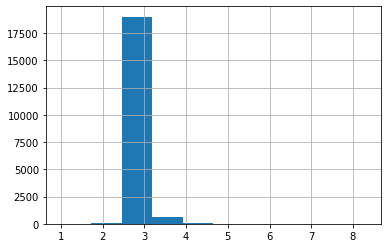

In [578]:
good_data['ceiling_height'].hist()

**Вывод**: В колонке высота потолка оказались по разному заполнены данные, привели к общему виду

In [579]:
good_data.loc[good_data['parks_nearest']>1000,'parks_nearest'] =  0

**Вывод**: Большая часть парков в диапозоне от 1 до 1000 метров от остальных можно избавиться.

#### Исследование на сколько быстро продавались квартиры

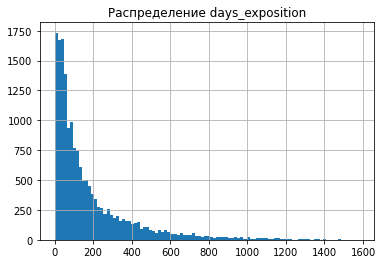

In [596]:
good_data['days_exposition'].hist(bins=100)
plt.title('Распределение days_exposition')
plt.show()

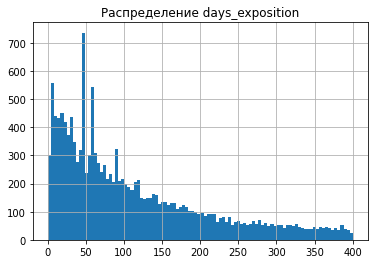

In [597]:
good_data['days_exposition'].hist(bins=100,range=(1,400))
plt.title('Распределение days_exposition')
plt.show()

In [582]:
good_data['days_exposition'].describe()

count    17123.000000
mean       179.843953
std        215.652403
min          1.000000
25%         44.000000
50%         98.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

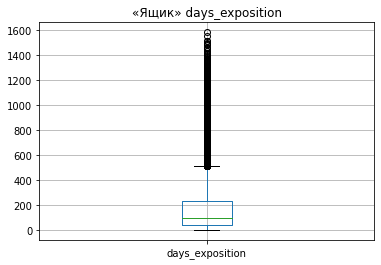

In [598]:
good_data.boxplot(column = 'days_exposition')
plt.title('«Ящик» days_exposition')
plt.show()

**Вывод**: Продажа квартиры согласуются с распределением Пуассона. В среднем за 200 дней распродаются 75% квартир. Больше 500 дней можно считать необычно долгими, а быстрые продажи занимают 50 дней.

In [584]:
good_data['cityCenters_nearest'].describe()

count    19691.000000
mean        11.303946
std          9.766335
min          0.000000
25%          3.000000
50%         12.000000
75%         15.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

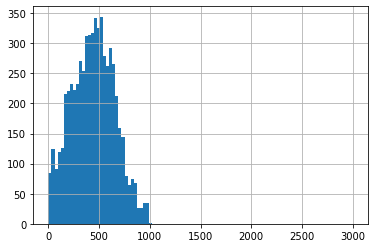

In [585]:
good_data['parks_nearest'].hist(bins=100,range=(1,3000))

#### Исследование влияние стоимости на жилье

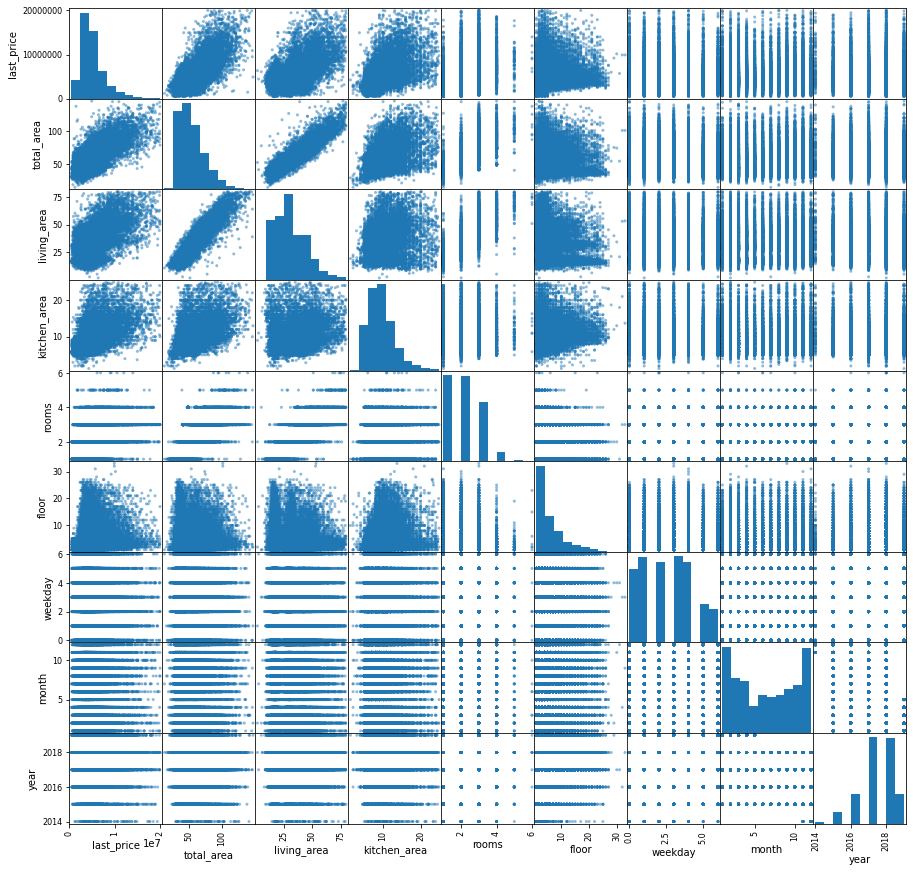

In [593]:
column_s = ['last_price','total_area','living_area','kitchen_area','rooms','floor','weekday','month','year']
df_s = good_data[column_s]
pd.plotting.scatter_matrix(df_s,figsize=(15,15))
plt.show()

**Вывод**: Что и следовало ожидать цена зависит от общей площади квартиры и жилой площади, коррелирует с площадью кухни и количеством комнат. Декабриские и январские покупки присутстсвуют больше, чем остальные месяцы. Стоимость жилья равномерно распределяется в зависимости дня недели, месяца, года и не коррелирует с ней. Количество продаж квартир увеличается от года к году 

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:

In [588]:
images = good_data.sort_values(by='total_images', ascending=False)
images.head(10)['one_per_metr'].mean()

106921.861

Вывод: Средняя цена одного квадратного метра  с наибольшим числом объявлений равна 109987

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [644]:
pivot = good_data.pivot_table(index='locality_name', values='one_per_metr', aggfunc=('count','mean'))
pivot

,count,mean
locality_name,,
Бокситогорск,10,16910.915000
Волосово,35,40144.608000
Волхов,91,35120.871319
Всеволожск,350,67196.921600
Выборг,181,58102.715580
...,...,...
село Путилово,2,39921.755000
село Рождествено,2,34553.885000
село Русско-Высоцкое,8,54991.515000


In [643]:
pivot.query('locality_name != "Неизвестно"').sort_values(by='mean', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,12888,107819.176779
Зеленогорск,21,106070.223810
Сестрорецк,155,101841.077032
Пушкин,311,101392.726592
Кудрово,148,99896.067432
деревня Мистолово,9,93294.498889
деревня Кудрово,223,92503.059507
Мурино,28,92200.776071
поселок Парголово,288,90756.002986


In [642]:
pivot.sort_values(by='mean', ascending=True).head(10)

,count,mean
locality_name,,
деревня Старополье,1,10368.660
деревня Ям-Тесово,1,12328.770
деревня Выскатка,2,12335.480
поселок Совхозный,1,12555.560
поселок Ефимовский,1,12686.570
деревня Малая Романовка,1,12724.550
поселок Тесово-4,1,12931.030
деревня Сижно,1,13709.680
поселок Житково,2,14956.275


**Вывод:** Населённый пункт с самой высокой стоимостью **Санкт-Петербург**.
Населённый пункт с самой низкой стоимостью **деревня Старополье**.

#### Стоимость квартир в Санкт-Петербурге на разном удалении от центра

-0.3789849810002749

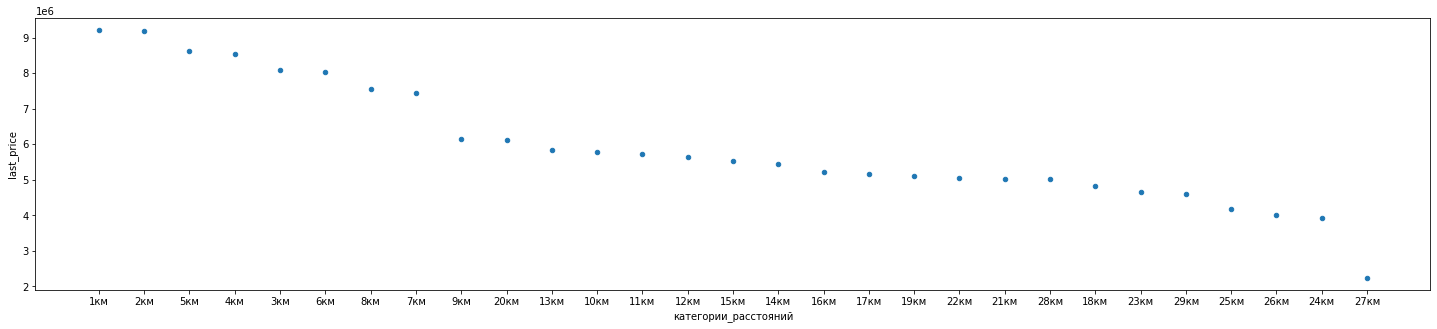

In [591]:
# Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра»:
spb_data = good_data.copy()
spb_data = spb_data.query('locality_name == "Санкт-Петербург"')
def spb_price_cat(row):
    for i in range(1,30):
            if row['cityCenters_nearest'] <= i:
                return f'{i}км'
spb_data['категории_расстояний'] = spb_data.apply(spb_price_cat,axis=1)
plot_spb = spb_data.groupby('категории_расстояний')['last_price'].agg('mean').reset_index().sort_values(by='last_price',ascending=False)
plot_spb.plot(kind='scatter',x='категории_расстояний',y='last_price',figsize=(25,5))
spb_data['cityCenters_nearest'].corr(spb_data['last_price'])

In [592]:
plot_spb['last_price'].diff().mean()

-248514.91839963835

**Вывод:** Построена таблица зависимости средней стоимости от центра города. Мы видим отрицательную корреляцию, чем дальше от центра, тем ниже стоимость. В среднем цена падает на 260 814 рублей. Есть провалы между 8 и 9 км, 24 и 27 километрами, возможно это связано с
недостаточной выборкой, но в общем тренд не меняется.

### Вывод

#### Предобработка данных:
- Заполнили данные `is_apartment` 88%, скорее всего связано с отсутствием непосредственно аппартаментов. 
- В колонке `balcony` по той же причине отсутсвует 48% данных.
- `airports_nearest, cityCenters_nearest, ponds_nearest` и остальные похожие колонки заполнили 0 из-за отсутствия данных 
- Пропуски `last_price`, `total_area`,`living_area`,`kitchen_area` были убраны часть квартир они составляли менее 3% от общих данных и давали большой выброс в каждой из колонок
- Пропуски `floors_total,days_exposition` данные отсутствуют их не трогали
- Есть большое количество отсутствия данных в `ceiling_height 38%`  заполнили медианным значением. 
- `locality_name` заполнили Неизвестно

#### Добавление стобцов
Добавили столбцы для анализа `one_per_metr, день недели, месяц, год`

#### Исследование данных
##### Зависимость продаж от времени 
В среднем за 200 дней распродаются 75% квартир. Больше 500 дней можно считать необычно долгими, а быстрые продажи занимают 50 дней.
##### Общие выводы между различными колонками

- Цена зависит от общей площади квартиры и жилой площади.
- Коррелирует с площадью кухни и количеством комнат. 
- Декабриские и январские покупки присутстсвуют больше, чем остальные месяцы. 
- Стоимость жилья равномерно распределяется в зависимости дня недели, месяца, года и не коррелирует с ней. 
- Количество продаж квартир увеличается от года к году.
- Средняя цена одного квадратного метра  с наибольшим числом объявлений равна `109 987`
- Населённый пункт с самой высокой стоимостью Санкт-Петербург. Населённый пункт с самой низкой стоимостью деревня Старополье.

##### Есть ли зависимость квартир в Санкт-Петербурге от расстояния
Да гипотеза потвердилась, в среднем цена падает на `260 814` рублей рублей за каждый километр от центра
#### Общий вывод:
В ходе исследования проверяли рыночную стоимость квартир и какие параметры на нее влияют. Наибольший вклад вносят общая и жилая площадь. Площадь кухни и количество также влияют, но меньше. Цена не зависит от месяца и года покупки квартир. Также цена зависит от центра города, например в городе Санкт-Петербург цена в среднем падает 260т рублей.